# Evaluation Methods for Classification

When building a machine learning model, a common approach on assessing the models performance is to get the models accuracy score. Even though this can be a good metric to asses the model performance, it ignores certain key model performance factor such as the presence of false positives and false negatives, knowing what fraction of the positive predictions are actually correct (precision)  and so on.

In this notebook, several key evaluation metrics used in classification is walked through using the digits dataset but binarized. The goal is to enhance the overall performance of the model and several evaluation metrics such as the confusion matrix, accuracy score, precision score, recall score, f1 score, classification report, roc curve, auc, grid search and cross validation will be utilised

#### Importing Libraries

In [28]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix, classification_report, precision_score
import warnings
warnings.filterwarnings('ignore')

#### Loading Dataset

In [29]:
# digits dataset

dataset = load_digits()
X, y = dataset.data, dataset.target

In [30]:
for class_label, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_label, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [31]:
# binarizing the dataset as 1 and not 1

y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0
print('Original:', y[0:20])
print('Binary Labels:', y_binary_imbalanced[0:20])

Original: [0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
Binary Labels: [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [42]:
# count of elements

bin_count = np.bincount(y_binary_imbalanced)
print('Count of 0:', x[0])
print('Count of 1:', x[1])

Count of 0: 1615
Count of 1: 182


#### Implementing Model Support Vector Machine

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)

from sklearn.svm import SVC

svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
print('Accuracy of Model: {:.0f}%'.format(svm.score(X_test, y_test)*100))

Accuracy of Model: 98%


In [7]:
# predicting test values

svm_y_pred = svm.predict(X_test)
svm_y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Confusion Matrices

In [8]:
print(confusion_matrix(y_test, svm_y_pred))

[[402   5]
 [  5  38]]


## Classification Report

In [9]:
print(classification_report(y_test, svm_y_pred, target_names = ['not 1', '1']))

              precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450



## Precision-Recall Curves

In [10]:
# logistic regression model building

from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [11]:
# applying decision function to plot the curve

y_dec = model.decision_function(X_test)

In [12]:
df_l = list(zip(y_test[0:20], y_dec[0:20]))
df_l

[(0, -34.604939976735196),
 (0, -17.99863490422057),
 (0, -20.991492319037526),
 (0, -36.778287211692586),
 (0, -39.29707707913165),
 (0, -18.85066411408463),
 (1, 5.99895838214584),
 (0, -32.68759855591022),
 (0, -35.46661258088268),
 (0, -37.33119317196025),
 (0, -25.0277394461842),
 (0, -21.397029947321833),
 (0, -36.48212884084434),
 (0, -15.908305982280542),
 (0, -12.832718534368713),
 (0, -13.714626562086181),
 (1, 14.759069206643584),
 (0, -39.375908539013345),
 (0, -26.077063537470117),
 (0, -28.42144805036)]

In [13]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_dec)

closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

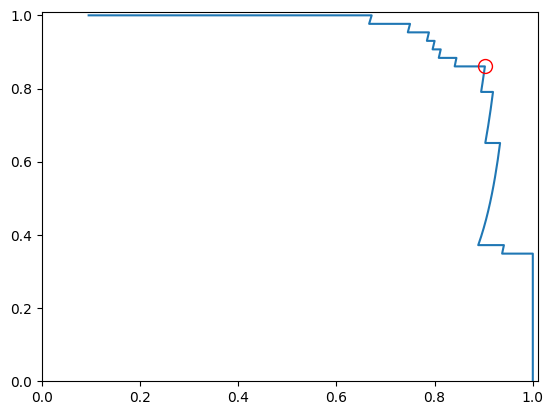

In [14]:
plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label = 'Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 10, fillstyle = 'none', c='r')
plt.show()

## ROC (Receiver Operating Characteristic) Curves

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC

model = SVC(kernel = 'rbf')
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0)
y_score = model.fit(X_train, y_train).decision_function(X_test)

fpr_lr, tpr_lr, thresholds = roc_curve(y_test, y_score)

In [43]:
auc_lr = auc(fpr_lr, tpr_lr)
print('Area Under the Curve:', auc_lr)

Area Under the Curve: 0.9993714644877436


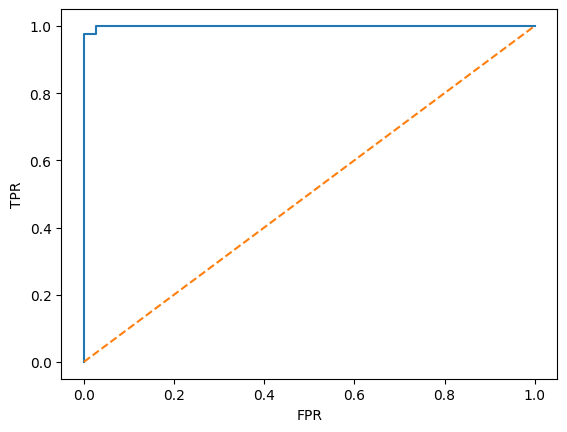

In [17]:
plt.plot(fpr_lr, tpr_lr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.plot([0, 1], linestyle = '--')
plt.show()

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state = 0) 
for g in [0.01, 0.1, 0.2, 1]:
    y_score = SVC(kernel = 'rbf', gamma = g).fit(X_train, y_train).decision_function(X_test)

    fpr_svc, tpr_svc, thresholds = roc_curve(y_test, y_score)
    auc_svc = auc(fpr_svc, tpr_svc)

    print('The AUC for the SVC model when gamma is',g,'is {:.2f}'.format(auc_svc))

The AUC for the SVC model when gamma is 0.01 is 1.00
The AUC for the SVC model when gamma is 0.1 is 0.98
The AUC for the SVC model when gamma is 0.2 is 0.66
The AUC for the SVC model when gamma is 1 is 0.50


## Multi-Class Classification Evaluation

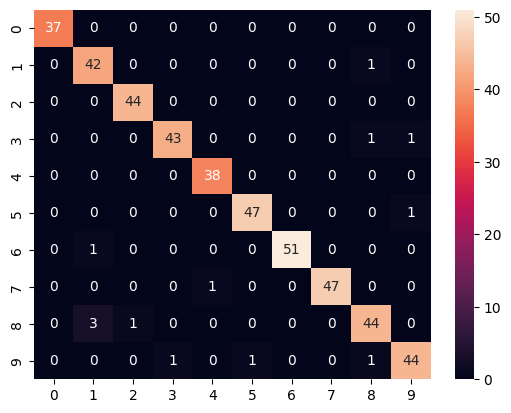

In [19]:
from sklearn.metrics import confusion_matrix

dataset = load_digits()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

svc_lin = SVC(kernel = 'linear').fit(X_train, y_train)
svc_lin_pred = svc_lin.predict(X_test)

svc_lin_cm = confusion_matrix(y_test, svc_lin_pred)

sns.heatmap(svc_lin_cm, annot = True)
plt.show()

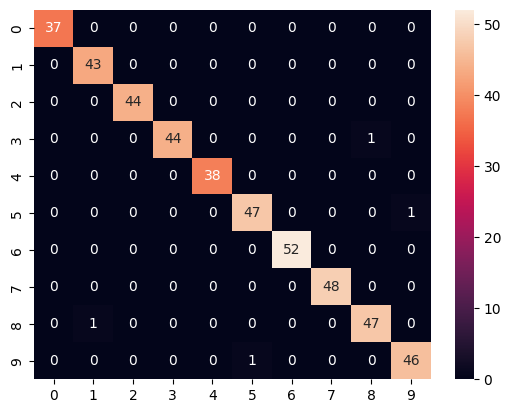

In [20]:
svc_lin = SVC(kernel = 'rbf').fit(X_train, y_train)
svc_lin_pred = svc_lin.predict(X_test)

svc_lin_cm = confusion_matrix(y_test, svc_lin_pred)
svc_lin_cm

sns.heatmap(svc_lin_cm, annot = True)
plt.show()

In [21]:
print(classification_report(y_test, svc_lin_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       1.00      1.00      1.00        44
           3       1.00      0.98      0.99        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       0.98      0.98      0.98        48
           9       0.98      0.98      0.98        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450



## Micro versus Macro Averaged Metrics

In [24]:
a = precision_score(y_test, svc_lin_pred, average = 'macro')
b = precision_score(y_test, svc_lin_pred, average = 'micro')
print('Precision Score (Macro Avg.): {:.4f}'.format(a))
print('Precision Score (Micro Avg.): {:.4f}'.format(b))

Precision Score (Macro Avg.): 0.9914
Precision Score (Micro Avg.): 0.9911


## Regression Evaluation Metrics

In [25]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error, r2_score

dataset = datasets.load_diabetes()

X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

lr = LinearRegression().fit(X_train, y_train)
lr_dummy = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

lr_pred = lr.predict(X_test)
lr_dummy_pred = lr_dummy.predict(X_test)

mse_lr = mean_squared_error(y_test, lr_pred)
mse_lr_dummy = mean_squared_error(y_test, lr_dummy_pred)

r2_lr = r2_score(y_test, lr_pred)
r2_lr_dummy = r2_score(y_test, lr_dummy_pred)

print('MSE for Real Model: {:.2f}'.format(mse_lr))
print('MSE for Dummy Model: {:.2f}'.format(mse_lr_dummy))
print('R2 Score for Real Model: {:.2f}'.format(r2_lr))
print('R2 Score for Dummy Model: {:.2f}'.format(r2_lr_dummy))

MSE for Real Model: 3180.16
MSE for Dummy Model: 4965.13
R2 Score for Real Model: 0.36
R2 Score for Dummy Model: -0.00


## Model Selection Using Cross-Validation

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target == 1
clf = SVC(kernel = 'linear', C = 1)

print('CVS (accuracy):', cross_val_score(clf, X, y))
print('CVS (AUC):', cross_val_score(clf, X, y, scoring = 'roc_auc'))
print('CVS (recall):', cross_val_score(clf, X, y,scoring = 'recall'))

CVS (accuracy): [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
CVS (AUC): [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
CVS (recall): [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


## Model Selection Using Grid Search

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()
X, y = dataset.data, dataset.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

clf = SVC(kernel = 'rbf')
grid_values = {'gamma' : [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

gs_cv = GridSearchCV(clf, param_grid = grid_values).fit(X_train, y_train)
print('Best Parameter and its Score for default metric: Accuracy')
print(gs_cv.best_params_)
print(gs_cv.best_score_)

Best Parameter and its Score for default metric: Accuracy
{'gamma': 0.001}
0.9910890816467024
